### Ensemble - Voting
- method: same datasets, different algorithm
- result: hard voting, soft voting
- datasets: skleran.load_breast_cancer()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

- Breast Caner Decision Model
    - feature len: 30
    - label: Diagnosis

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
breast_data = load_breast_cancer(as_frame=True)

In [6]:
print(f"target_name: {breast_data['target_names']}")
print(f"feature_names: {breast_data['feature_names']}")

target_name: ['malignant' 'benign']
feature_names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
feature_df = breast_data['data']
label_sr = breast_data['target']

In [8]:
feature_df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [9]:
label_sr.head(2)

0    0
1    0
Name: target, dtype: int32

In [10]:
print(f"feature: {feature_df.shape}, {feature_df.ndim}D")
print(f"label: {label_sr.shape}, {label_sr.ndim}D")

feature: (569, 30), 2D
label: (569,), 1D


In [23]:
data_df = pd.concat([feature_df, pd.DataFrame(label_sr, columns=['target'])], axis=1)

In [25]:
feature_corr = data_df.corr()

In [13]:
import seaborn as sns

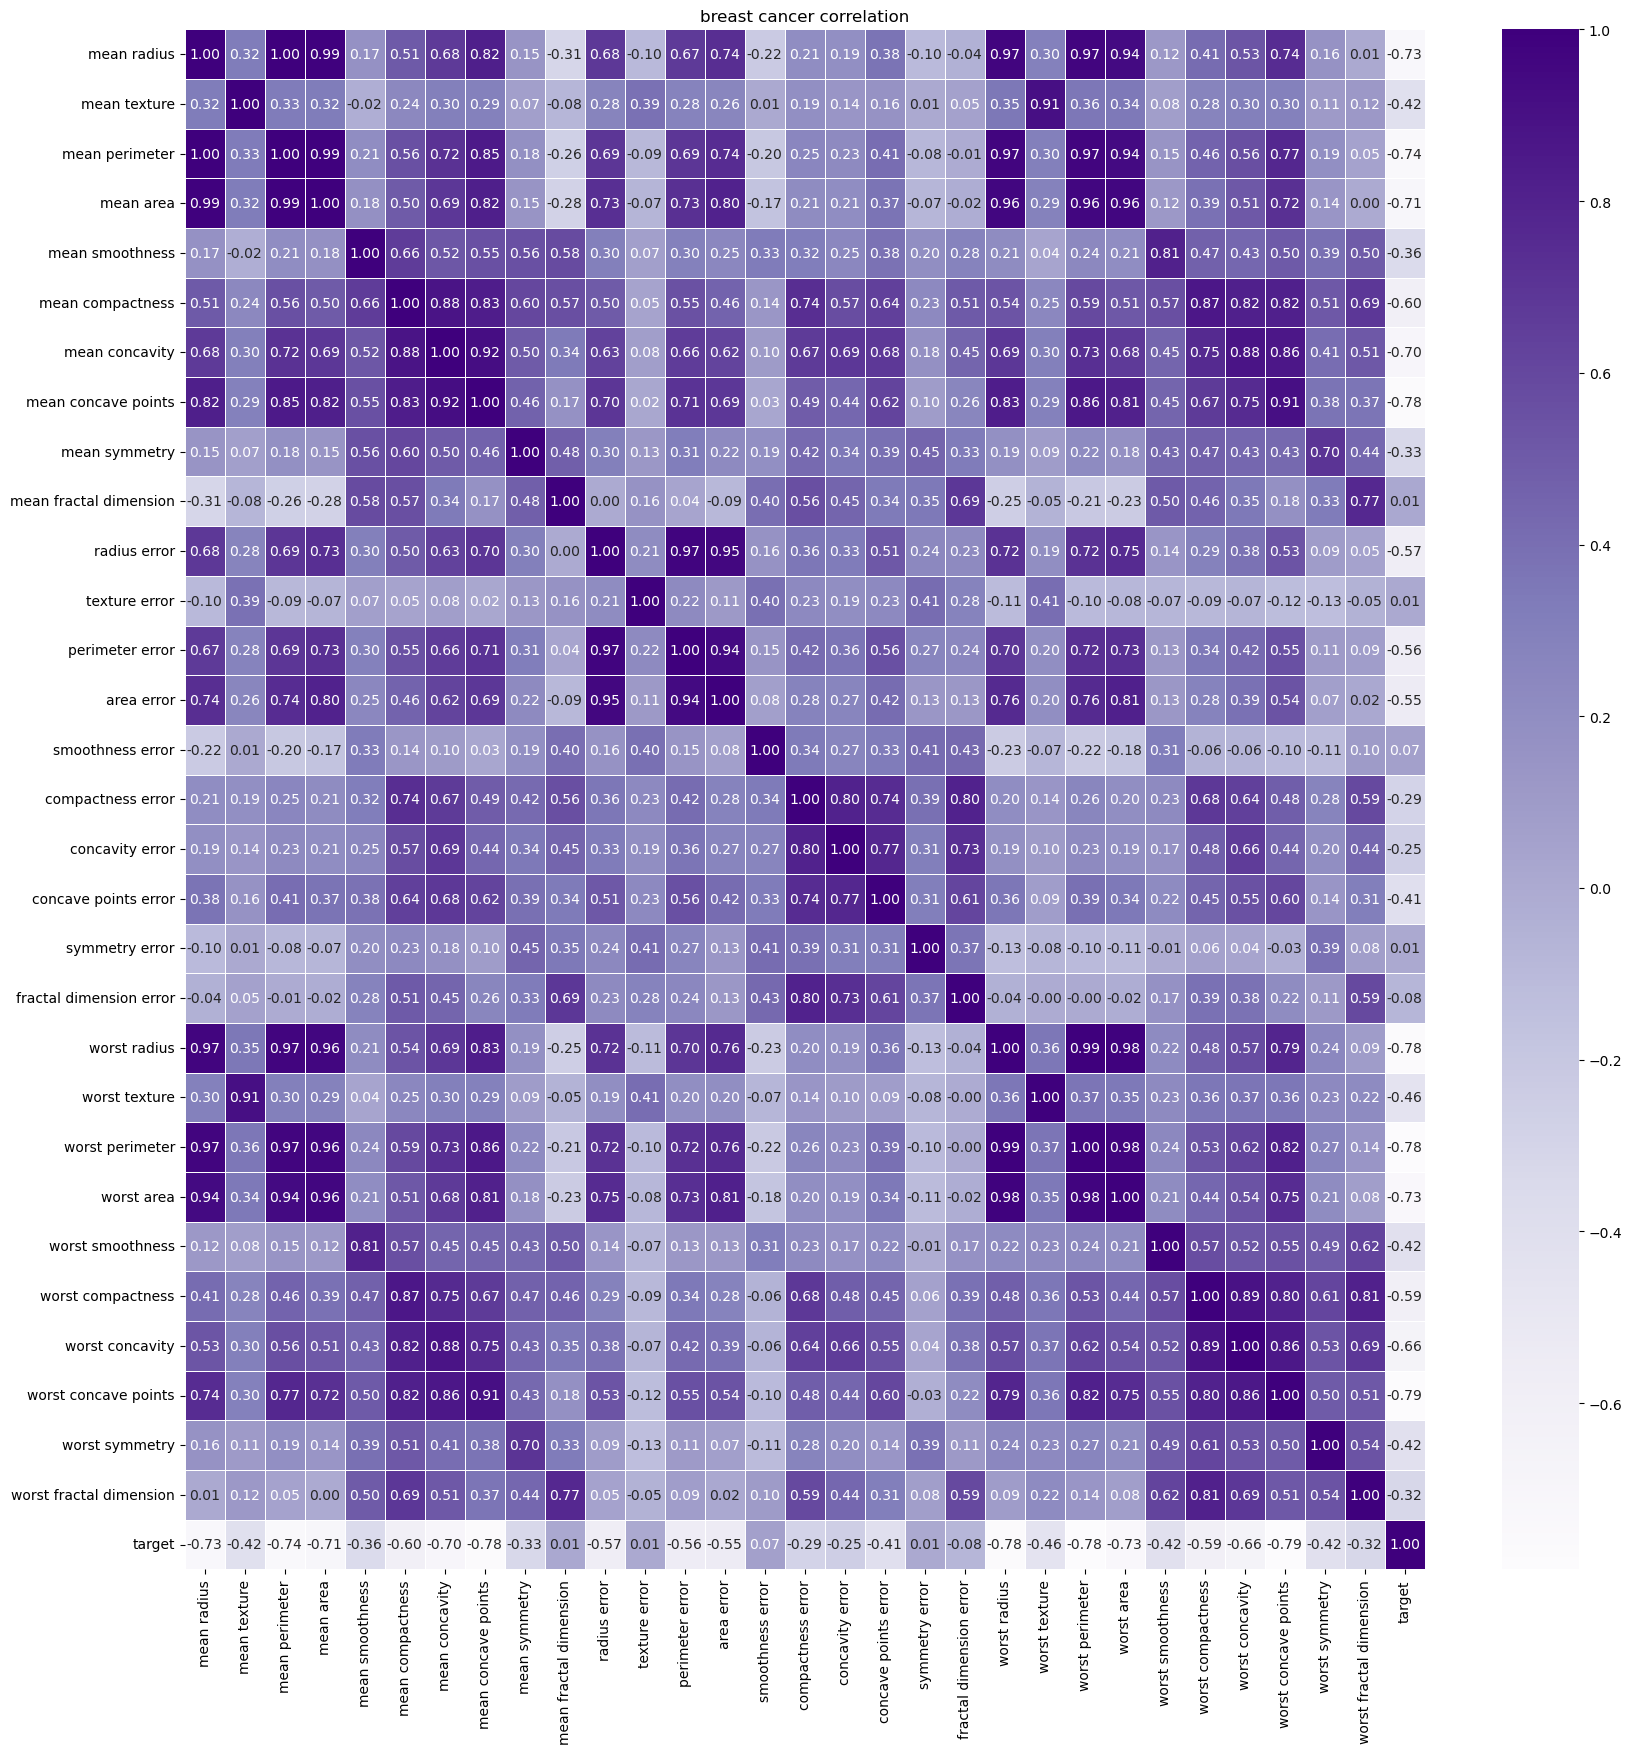

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(feature_corr, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5)
plt.title('breast cancer correlation')
plt.show()

- 0.7~1사이의 correlation을 보이는 feature
    - mean radius: -0.73
    - mean perimeter: -0.74
    - mean area: -0.71
    - mean concave points: - 0.78
    - worst radius: -0.78
    - worst perimeter: -0.78
    - worst area: -0.73
    - worst concave points: -0.79

In [21]:
# train : test = 80 : 20
# stratify : label_sr
# random_state = 11

X_train, X_test, y_train, y_test = train_test_split(feature_df, label_sr, random_state=11, stratify=label_sr, test_size=0.2)

print(f"X train: {X_train.shape}, {X_train.ndim}D")
print(f"y train: {y_train.shape}, {y_train.ndim}D\n")
print(f"X test: {X_test.shape}, {X_test.ndim}D")
print(f"y test: {y_test.shape}, {y_test.ndim}D\n")
print(f"train test ratio: {len(X_train)/len(feature_df)*100:.2f} %, {len(X_test)/len(feature_df)*100:.2f} %")

X train: (455, 30), 2D
y train: (455,), 1D

X test: (114, 30), 2D
y test: (114,), 1D

train test ratio: 79.96 %, 20.04 %


- learning method: supervised leanring, ensemble voting
- learninf algorithm: K-Nearest Neighbors Classifier, Logistic Regression, Decision Tree Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

In [29]:
# model instance
knn_model = KNeighborsClassifier()
dtc_model = DecisionTreeClassifier(random_state=10)
lg_model = LogisticRegression(solver='liblinear')

In [45]:
# voting instance
vh_model = VotingClassifier(estimators=[('knn_model', knn_model), ('dtc_model', dtc_model), ('lg_model', lg_model)],
                                voting='hard')

vs_model = VotingClassifier(estimators=[('knn_model', knn_model), ('dtc_model', dtc_model), ('lg_model', lg_model)],
                                voting='soft')

In [46]:
vh_model.fit(X_train.values, y_train.values)

VotingClassifier(estimators=[('knn_model', KNeighborsClassifier()),
                             ('dtc_model',
                              DecisionTreeClassifier(random_state=10)),
                             ('lg_model',
                              LogisticRegression(solver='liblinear'))])

In [47]:
vs_model.fit(X_train.values, y_train.values)

VotingClassifier(estimators=[('knn_model', KNeighborsClassifier()),
                             ('dtc_model',
                              DecisionTreeClassifier(random_state=10)),
                             ('lg_model',
                              LogisticRegression(solver='liblinear'))],
                 voting='soft')

In [48]:
# model parameter
print('[hard voting]')
print(f"classes_: {vh_model.classes_}\n")
print(f"estimators_: {vh_model.estimators_}")
print(f"named_estimators_: {vh_model.named_estimators_}\n\n\n")


print('[doft voting]')
print(f"classes_: {vs_model.classes_}\n")
print(f"estimators_: {vs_model.estimators_}")
print(f"named_estimators_: {vs_model.named_estimators_}\n\n\n")

# print(f"feature_names_in: {voting_model.feature_names_in_}")
# print(f"n_features_in_: {voting_model.n_features_in_}")


[hard voting]
classes_: [0 1]

estimators_: [KNeighborsClassifier(), DecisionTreeClassifier(random_state=10), LogisticRegression(solver='liblinear')]
named_estimators_: {'knn_model': KNeighborsClassifier(), 'dtc_model': DecisionTreeClassifier(random_state=10), 'lg_model': LogisticRegression(solver='liblinear')}



[doft voting]
classes_: [0 1]

estimators_: [KNeighborsClassifier(), DecisionTreeClassifier(random_state=10), LogisticRegression(solver='liblinear')]
named_estimators_: {'knn_model': KNeighborsClassifier(), 'dtc_model': DecisionTreeClassifier(random_state=10), 'lg_model': LogisticRegression(solver='liblinear')}





- 성능 확인
    - Error Message : AttributeError: 'Flags' object has no attribute 'c_contiguous'
    - ndarray type으로 변경

In [50]:
vh_train_score = vh_model.score(X_train.values, y_train.values)
vh_test_score = vh_model.score(X_test.values, y_test.values)

vs_train_score = vs_model.score(X_train.values, y_train.values)
vs_test_score = vs_model.score(X_test.values, y_test.values)

print('hard voting')
print(f"train score: {vh_train_score*100:.2f} %")
print(f"test score: {vh_test_score*100:.2f} %\n")
print('soft voting')
print(f"train score: {vs_train_score*100:.2f} %")
print(f"test score: {vs_test_score*100:.2f} %")

hard voting
train score: 97.80 %
test score: 93.86 %

soft voting
train score: 99.12 %
test score: 93.86 %
